# Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
list_df = pd.read_csv('C:/Users/User/Desktop/listings.csv') # Fill in with dataset file path
list_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,2.016090e+13,07-09-16,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,2.016090e+13,07-09-16,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,2.016090e+13,07-09-16,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,2.016090e+13,07-09-16,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,2.016090e+13,07-09-16,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


# Data processing

### Delete useless columns

In [3]:
dropcol=['listing_url','scrape_id','jurisdiction_names','license','thumbnail_url','medium_url','picture_url','xl_picture_url'
        ,'host_thumbnail_url','host_picture_url','neighbourhood_group_cleansed']
list_df.drop(dropcol, axis=1, inplace=True)

### Missing data statistics

In [4]:
#Create a summary table of missing value
total = list_df.isnull().sum().sort_values(ascending=False)
percent = (list_df.isnull().sum()/list_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(12)

,Total,Percent
has_availability,3585,1.000000
square_feet,3529,0.984379
monthly_price,2697,0.752301
weekly_price,2693,0.751185
security_deposit,2243,0.625662
notes,1975,0.550907
interaction,1554,0.433473
access,1489,0.415342
neighborhood_overview,1415,0.394700
host_about,1309,0.365132


In [5]:
# Drop columns base on former criterion
missing= ['has_availability','square_feet','monthly_price','weekly_price','security_deposit','notes','interaction',
          'access','neighborhood_overview','host_about','transit','house_rules']
list_df.drop(missing, axis=1, inplace=True)

# Drop rows with NA in given subset
list_df.dropna(subset=['host_response_time','host_response_rate', 'host_acceptance_rate'],inplace=True)

list_df

,id,last_scraped,name,summary,space,description,experiences_offered,host_id,host_url,host_name,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1,3075044,07-09-16,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,2572247,https://www.airbnb.com/users/show/2572247,Andrea,...,10.0,9.0,9.0,f,t,moderate,f,f,1,1.30
2,6976,07-09-16,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,16701,https://www.airbnb.com/users/show/16701,Phil,...,10.0,9.0,10.0,f,f,moderate,t,f,1,0.47
3,1436513,07-09-16,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,6031442,https://www.airbnb.com/users/show/6031442,Meghna,...,10.0,10.0,10.0,f,f,moderate,f,f,1,1.00
4,7651065,07-09-16,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,15396970,https://www.airbnb.com/users/show/15396970,Linda,...,10.0,9.0,10.0,f,f,flexible,f,f,1,2.25
5,12386020,07-09-16,Private Bedroom + Great Coffee,Super comfy bedroom plus your own bathroom in ...,Our sunny condo is located on the second and t...,Super comfy bedroom plus your own bathroom in ...,none,64200298,https://www.airbnb.com/users/show/64200298,Deborah,...,10.0,9.0,10.0,f,f,flexible,f,f,1,1.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,8373729,07-09-16,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,19246369,https://www.airbnb.com/users/show/19246369,Joe,...,10.0,8.0,9.0,f,t,strict,f,f,8,0.34
3581,14844274,07-09-16,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,37366454,https://www.airbnb.com/users/show/37366454,Ivy,...,NaN,NaN,NaN,f,f,strict,f,f,2,NaN
3582,14585486,07-09-16,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,11311919,https://www.airbnb.com/users/show/11311919,Vera,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
3583,14603878,07-09-16,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,74318064,https://www.airbnb.com/users/show/74318064,Medi,...,9.0,8.0,7.0,f,f,strict,f,f,1,2.00


### Transform data type

In [6]:
# Fix some datatype errors, extract numbers and transform to integer
cols = ['host_response_rate', 'host_acceptance_rate', 'price','cleaning_fee' , 'extra_people']
for col in cols:
    list_df[col] = list_df[col].str.extract(r'(\d+)')
    list_df[col] = list_df[col].astype('float64').astype('Int64')
list_df.columns
# Extract the number of amenities 
list_df['n_amenities'] = list_df['amenities'].apply(lambda x: len(x.replace('{', '').\
                        replace('{', '').replace('"', '').split(',')))
list_df.drop('amenities', axis=1, inplace=True)
newlist= list_df.select_dtypes(include=['int', 'float'])
# Use Median to replace with NA
int_fillmean = lambda x: x.fillna(round(x.mean()))
newlist = newlist.apply(int_fillmean, axis=0)
newlist = newlist.drop(['id', 'host_id', 'latitude', 'longitude'], axis=1).astype(float)

In [7]:
list_df.describe()

,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,n_amenities
count,3.114000e+03,3.114000e+03,3114.0,3114.0,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3101.000000,...,2552.000000,2544.000000,2548.000000,2547.000000,2548.000000,2546.000000,2547.000000,3114.000000,2593.000000,3114.000000
mean,8.378000e+06,2.420140e+07,94.989082,84.173089,67.645472,67.645472,42.339530,-71.084168,3.089595,1.229120,...,92.023511,9.438286,9.288462,9.647428,9.647959,9.412019,9.166470,14.496468,2.114192,16.102119
std,4.608691e+06,2.264619e+07,12.517686,21.779254,182.017217,182.017217,0.024936,0.031145,1.816157,0.513828,...,8.996767,0.896165,1.104828,0.749808,0.726205,0.900293,0.982849,31.184685,2.153386,4.759677
min,3.353000e+03,4.240000e+03,0.0,0.0,0.000000,0.000000,42.235942,-71.171789,1.000000,0.000000,...,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.010000,1.000000
25%,4.505173e+06,5.618949e+06,97.0,71.0,1.000000,1.000000,42.328223,-71.103884,2.000000,1.000000,...,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.610000,13.000000
50%,8.515144e+06,1.851778e+07,100.0,94.0,2.000000,2.000000,42.345099,-71.078032,2.000000,1.000000,...,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.360000,16.000000
75%,1.292461e+07,3.453278e+07,100.0,100.0,11.000000,11.000000,42.354781,-71.062057,4.000000,1.000000,...,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.000000,2.970000,19.000000
max,1.493346e+07,9.185532e+07,100.0,100.0,749.000000,749.000000,42.389982,-71.000100,16.000000,6.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,136.000000,19.150000,31.000000


# Data analysis

### Price analysis

In [8]:
# Price summary

def status(x) : 
    return pd.Series([x.count(),x.min(),x.quantile(.25),x.median(),
                      x.quantile(.75),x.mean(),x.max(),x.var(),x.std(),x.skew(),x.kurt()],
                     index=['Size','MIN','25% quantile','Median','75% quantile','Mean','MAX','Var','STD','skew','kurt'])
summary=pd.DataFrame(round(status(list_df.price),2))
print(summary)

                     0
Size           3114.00
MIN               1.00
25% quantile     85.00
Median          150.00
75% quantile    220.00
Mean            169.61
MAX             999.00
Var           12208.52
STD             110.49
skew              1.76
kurt              5.31


Text(0.5, 0, 'Price (dollar)')

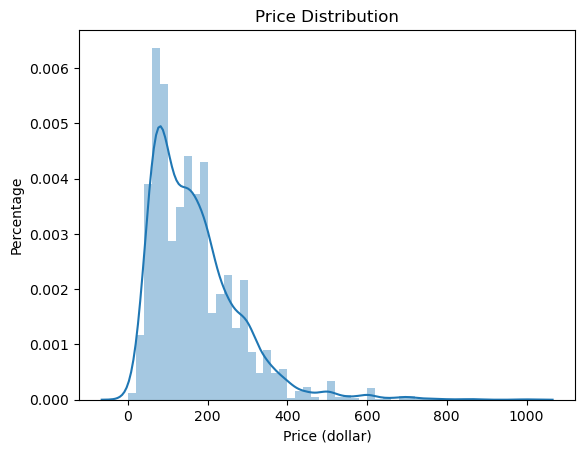

In [9]:
# Price distribution
sns.distplot(list_df['price'])
plt.title('Price Distribution', fontsize=12)
plt.ylabel('Percentage', fontsize=10)
plt.xlabel('Price (dollar)', fontsize=10)

### Heatmap of numberical variables

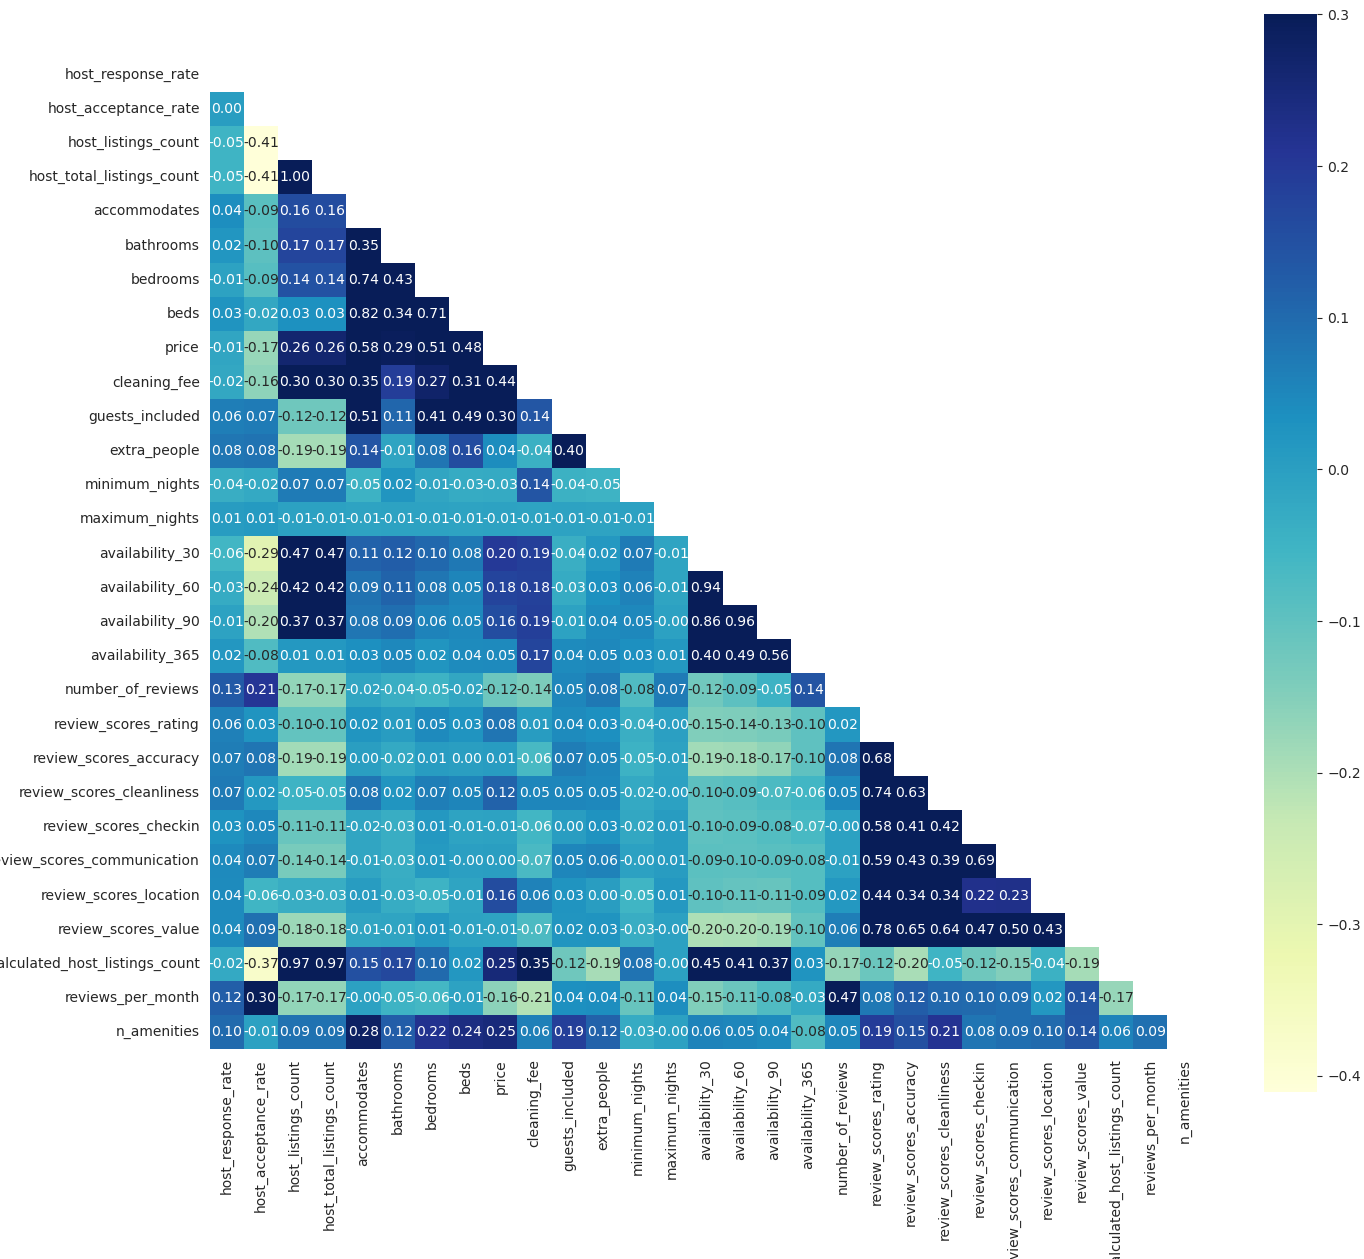

In [10]:
corr=newlist.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 14))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, fmt='.2f',cmap='YlGnBu')


### Categorical variables analysis

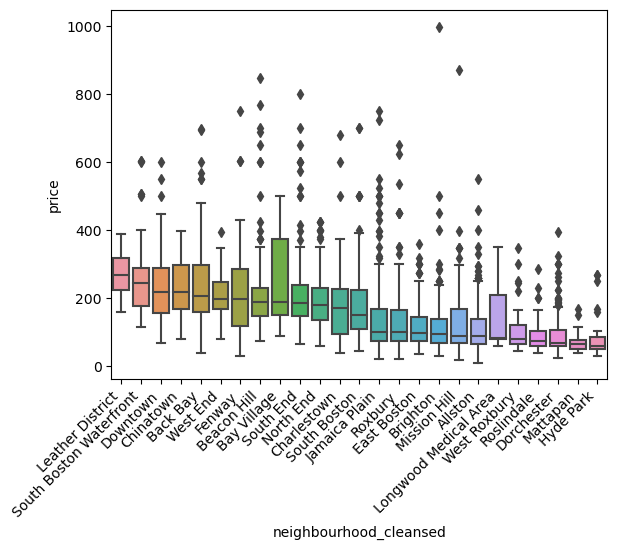

In [11]:
# Boxplot for neighbourhood
list_df = list_df[list_df['price'] > 10] 
order_neigh=list_df.groupby('neighbourhood_cleansed')['price'].median().sort_values(ascending=False).index
sns.boxplot(y=list_df.price, x=list_df.neighbourhood_cleansed,order=order_neigh)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

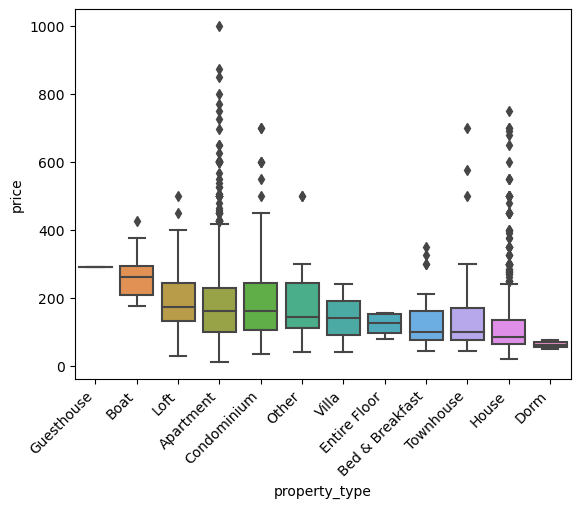

In [12]:
# Boxplot for property type
order_room_type=list_df.groupby('property_type')['price'].median().sort_values(ascending=False).index
sns.boxplot(y=list_df.price, x=list_df.property_type,order=order_room_type)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

<Axes: xlabel='room_type', ylabel='price'>

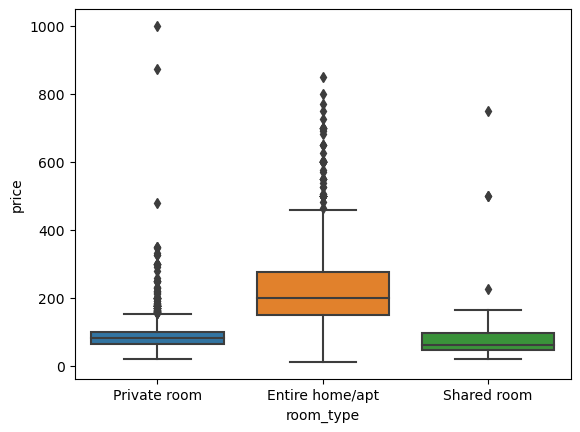

In [13]:
# Boxplot for room type
sns.boxplot(y='price', x='room_type', data=list_df)

<Axes: xlabel='bed_type', ylabel='price'>

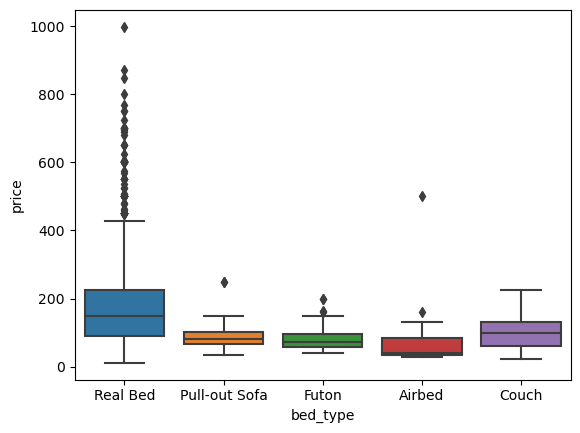

In [14]:
# Boxplot for bed type
sns.boxplot(y='price', x='bed_type', data=list_df)

<Axes: xlabel='cancellation_policy', ylabel='price'>

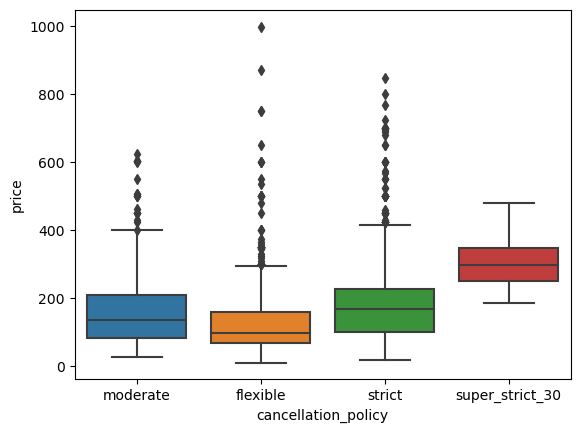

In [15]:
# Boxplot for cancellation policy
sns.boxplot(y='price', x='cancellation_policy', data=list_df)

# Data modeling

In [16]:
!pip install xgboost

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Restructure the dataset

In [18]:
# Create new list from listing data (int and float only)

num = ['price', 'latitude','longitude', 'accommodates', 'bedrooms', 'bathrooms', 'beds', 'cleaning_fee', 'guests_included',
       'host_response_rate', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'review_scores_rating', 
       'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_location', 'review_scores_value', 
       'calculated_host_listings_count', 'extra_people']

In [19]:
# Add list to new variable:

data = list_df.select_dtypes(include=['int64', 'float64'])[num]

In [20]:
# Create new list from listing data (object only)

obj = ['neighbourhood', 'require_guest_phone_verification', 'bed_type', 'room_type', 'host_is_superhost', 'cancellation_policy', 
       'property_type', 'is_location_exact']

In [21]:
# Combine two lists
data[obj] = list_df[obj]


### New dataset processing

In [22]:
d_data = data.copy()
new_data = pd.get_dummies(d_data)
new_data = new_data.dropna(axis=0,how ='any' , subset=None, inplace=False) # Drop NA values


# Split data
y = new_data['price'].values
X = new_data.drop('price', axis =1)
y_df = pd.DataFrame(y, columns=['price'])

# Scale the features
scaler = StandardScaler() #mean=0,standard decviation =0
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y_df.values)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.20, random_state=45)



### Ridge Regression

In [23]:
#ridgecv got lots of error terms,use cross validation to find optimal lamda
rid_model = RidgeCV(alphas=np.logspace(-3,3,100), cv=10, scoring='neg_mean_absolute_error') #error terms range(10^-3,10^3)
rid_model.fit(X_train, y_train)  #train each lambda and used to find the best landa                                

ridge_model = Ridge(alpha=rid_model.alpha_) #use best lambda to train model
ridge_model.fit(X_train, y_train)

y_predict = ridge_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
mae = mean_absolute_error(y_test,y_predict)
print("RMSE:",rmse)
print("MAE:",mae)

RMSE: 0.5264925034179878
MAE: 0.3558293117128417


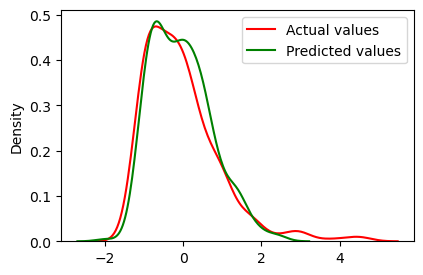

In [24]:
# Plot predicted and original values:

plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
ax1=sns.kdeplot(data=np.array(y_test).squeeze(), color = 'red',label='Actual values')
ax2=sns.kdeplot(data=y_predict.squeeze(), color = 'g', label='Predicted values')
plt.legend()


### XGBoost

In [25]:
xg_reg = xgb.XGBRegressor(base_score=0.3, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.24, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=1, n_estimators=102,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, subsample=1)

In [26]:
eval_set = [(X_train, y_train), (X_test, y_test)]
xg_reg.fit(X_train, y_train, eval_metric=["rmse"],eval_set=eval_set, verbose=True)
preds = xg_reg.predict(X_test)

[09:13:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.04091	validation_1-rmse:1.02428
[1]	validation_0-rmse:1.03624	validation_1-rmse:1.01948
[2]	validation_0-rmse:1.03051	validation_1-rmse:1.01372
[3]	validation_0-rmse:1.02913	validation_1-rmse:1.01236
[4]	validation_0-rmse:1.02372	validation_1-rmse:1.00641
[5]	validation_0-rmse:1.01794	validation_1-rmse:1.00036
[6]	validation_0-rmse:1.01332	validation_1-rmse:0.99560
[7]	validation_0-rmse:1.00862	validation_1-rmse:0.99081
[8]	validation_0-rmse:1.00438	validation_1-rmse:0.98621
[9]	validation_0-rmse:0.99876	validation_1-rmse:0.98035
[10]	validation_0-rmse:0.99448	validation_1-rmse:0.97612
[11]	validation_0-rmse:0.98905	validation_1-rmse:0.97040
[12]	validation_0-rmse:0.98409	validation_1-rmse:0.96536
[13]	validation_0-rmse:0.98181	validat

In [27]:
rmse2 = np.sqrt(mean_squared_error(y_test, preds))
mae2 = mean_absolute_error(y_test,preds)
print("RMSE:",rmse2)
print("MAE:",mae2)

RMSE: 0.7044493294985527
MAE: 0.5383671257487752


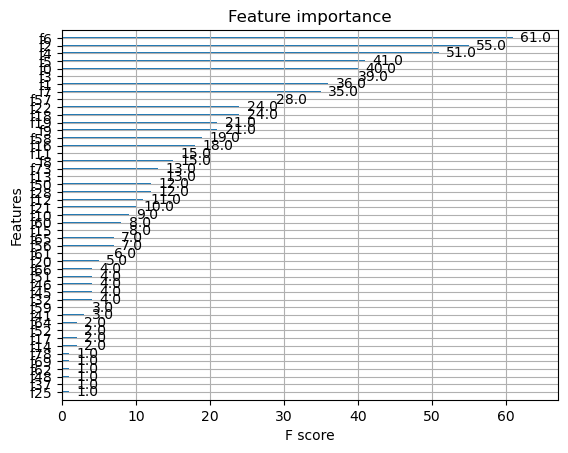

In [28]:
#Show which features more importance
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [7, 7]
plt.show()

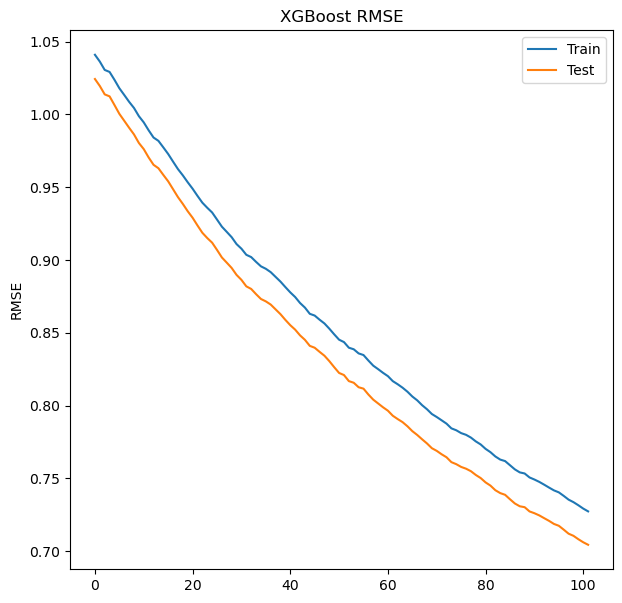

In [29]:
# performance metrics
results = xg_reg.evals_result()
epochs =len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# plot RMSE
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()


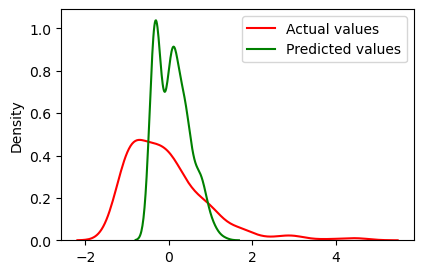

In [30]:
# Plot predicted and original values:

plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
ax1=sns.kdeplot(data=np.array(y_test).squeeze(), color = 'red',label='Actual values')
ax2=sns.kdeplot(data=preds.squeeze(), color = 'g', label='Predicted values')
plt.legend()



In [31]:
cross_val = cross_val_score(xg_reg, X_test, y_test, cv = 5)

print('The cross val mean is:', np.mean(cross_val), 'and variance is:', np.std(cross_val))

[09:13:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[09:13:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[09:13:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[09:13:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[09:13:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscal

### Support Vector Regression

In [32]:
# Create and train the SVR model
svr = SVR(kernel='rbf')  # You can experiment with different kernel functions
svr.fit(X_train, y_train)

# Predict on the test set
y_pred = svr.predict(X_test)

In [33]:
rmse3 = np.sqrt(mean_squared_error(y_test, y_pred))
mae3 = mean_absolute_error(y_test,y_pred)
print("RMSE:",rmse3)
print("MAE:",mae3)

RMSE: 0.5103037268940407
MAE: 0.3321191779695035


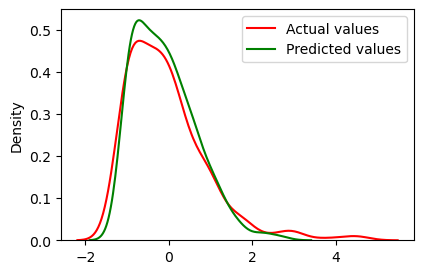

In [34]:
# Plot predicted and original values:

plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
ax1=sns.kdeplot(data=np.array(y_test).squeeze(), color = 'red',label='Actual values')
ax2=sns.kdeplot(data=y_pred.squeeze(), color = 'g', label='Predicted values')
plt.legend()


## Comparison (Bar Chart)

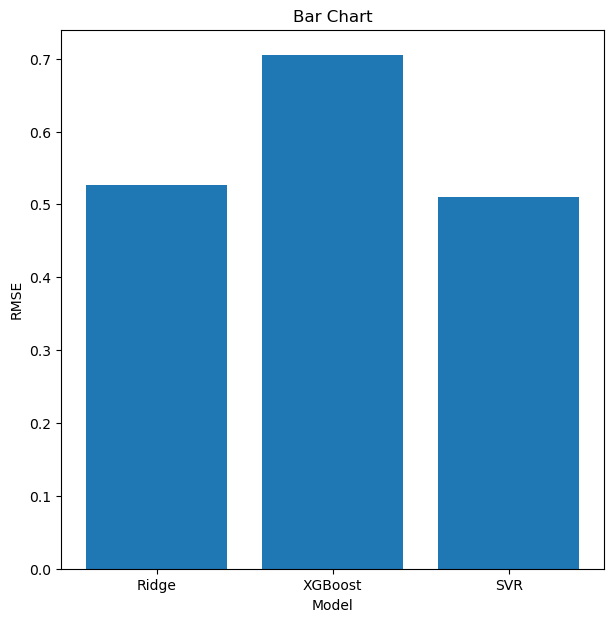

In [35]:
#plot RMSE
categories = ['Ridge', 'XGBoost', 'SVR']
values = [rmse, rmse2, rmse3]

# Create a bar chart
plt.bar(categories, values)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Bar Chart')

# Display the chart
plt.show()


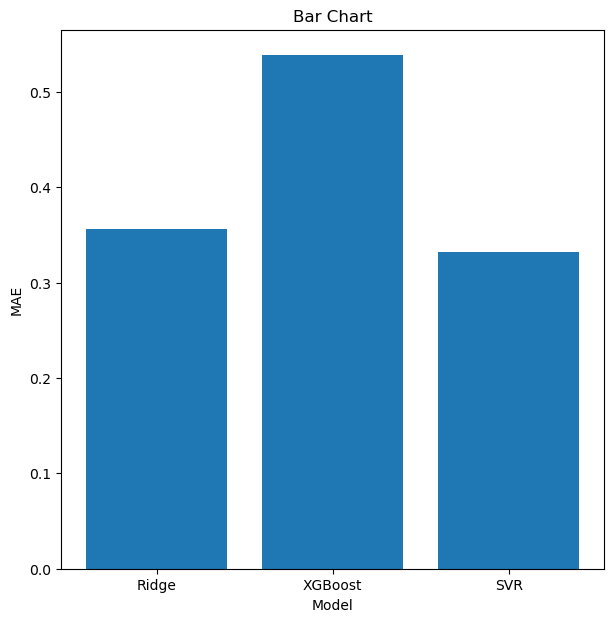

In [36]:
#plot RMSE
categories = ['Ridge', 'XGBoost', 'SVR']
values = [mae, mae2, mae3]

# Create a bar chart
plt.bar(categories, values)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('Bar Chart')

# Display the chart
plt.show()


# Results


In [37]:
data = {
    'Model': ['Ridge Regression', 'XGBoost', 'SVR'],
    'RMSE': [rmse, rmse2, rmse3],
    'MAE': [mae, mae2, mae3]
}

df = pd.DataFrame(data)

# Print the DataFrame
print(df)

              Model      RMSE       MAE
0  Ridge Regression  0.526493  0.355829
1           XGBoost  0.704449  0.538367
2               SVR  0.510304  0.332119
